In [33]:
import stock_class
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
stock = stock_class.Stock(name='AAPL')
stock.set_yahoo_pull_start_date(datetime.date(2022,2,1))
stock.set_yahoo_pull_end_date(datetime.date(2022,3,24))

In [26]:
df = stock.yahoo_pull_data()

In [27]:
stock.set_data(df)

In [28]:
stock.sma_calc(period=20)

In [29]:
stock.sma_cross(sma_short_days=14, sma_long_days=20)

In [30]:
stock.rsi_calc(lookback=14)

diffs Date
2022-02-01         NaN
2022-02-02    1.229996
2022-02-03   -2.940002
2022-02-04   -0.509995
2022-02-07   -0.729996
2022-02-08    3.169998
2022-02-09    1.449997
2022-02-10   -4.160004
2022-02-11   -3.479996
2022-02-14    0.240005
2022-02-15    3.909988
2022-02-16   -0.239990
2022-02-17   -3.669998
2022-02-18   -1.580002
2022-02-22   -2.979996
2022-02-23   -4.250000
2022-02-24    2.669998
2022-02-25    2.110001
2022-02-28    0.269989
2022-03-01   -1.919998
2022-03-02    3.360001
2022-03-03   -0.330002
2022-03-04   -3.059998
2022-03-07   -3.869995
2022-03-08   -1.860001
2022-03-09    5.509995
2022-03-10   -4.429993
2022-03-11   -3.790009
2022-03-14   -4.110001
2022-03-15    4.470001
2022-03-16    4.500000
2022-03-17    1.029999
2022-03-18    3.360001
2022-03-21    1.400009
2022-03-22    3.440002
2022-03-23    1.389999
2022-03-24    3.860001
Name: Close, dtype: float64
ups Date
2022-02-01    0.000000
2022-02-02    1.229996
2022-02-03    0.000000
2022-02-04    0.000000
2022-02-0

In [48]:
stock.data

,High,Low,Open,Close,Volume,Adj Close,Date,Ticker,sma_20,sma_14,sma_cross_14_20,rsi_14,rsi_buy,rsi_sell
Date,,,,,,,,,,,,,,
2022-02-01,174.839996,172.309998,174.009995,174.610001,86213900.0,174.387817,2022-02-01 00:00:00,AAPL,NaN,NaN,0.0,NaN,0.000000,0.0
2022-02-02,175.880005,173.330002,174.750000,175.839996,84914300.0,175.616257,2022-02-02 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-03,176.240005,172.119995,174.479996,172.899994,89418100.0,172.679993,2022-02-03 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-04,174.100006,170.679993,171.679993,172.389999,82465400.0,172.389999,2022-02-04 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-07,173.949997,170.949997,172.860001,171.660004,77251200.0,171.660004,2022-02-07 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-08,175.350006,171.429993,171.729996,174.830002,74829200.0,174.830002,2022-02-08 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-09,176.649994,174.899994,176.050003,176.279999,71285000.0,176.279999,2022-02-09 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-10,175.479996,171.550003,174.139999,172.119995,90865900.0,172.119995,2022-02-10 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0
2022-02-11,173.080002,168.039993,172.330002,168.639999,98670700.0,168.639999,2022-02-11 00:00:00,AAPL,NaN,NaN,NaN,NaN,0.000000,0.0


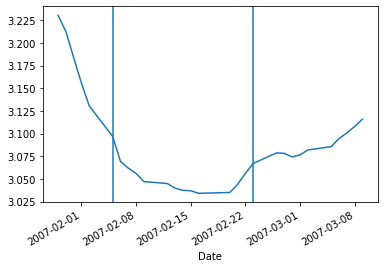

In [9]:
plt.figure()
stock.data.sma_14.plot()
plt.axvline('2007-02-23')
plt.axvline('2007-02-05')

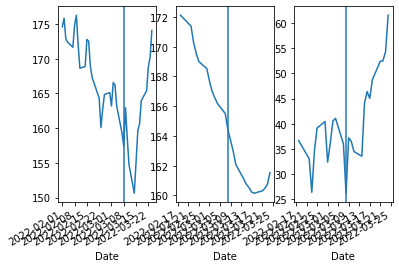

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3)
vline_date = stock.data.index[np.argmin(stock.data.rsi_14)]
plot0 = stock.data.Close.plot(ax=axes[0])
plot0.axvline(vline_date)
plot1 = stock.data.sma_14.plot(ax=axes[1])
plot1.axvline(vline_date)
plot2 = stock.data.rsi_14.plot(ax=axes[2])
plot2.axvline(vline_date)

In [46]:
def rsi_strategy(stock):
    stock.data['rsi_buy'] = stock.data.rsi_14.where(stock.data.rsi_14<30,0)
    stock.data['rsi_sell'] = stock.data.rsi_14.where(stock.data.rsi_14>70,0)

In [76]:
def profit(stock, strategy):
    if len(stock.data.rsi_buy[stock.data.rsi_buy != 0]) != 0:
        buy = stock.data.Close[stock.data.rsi_buy == stock.data.rsi_buy[stock.data.rsi_buy != 0][0]]
    if len(stock.data.rsi_sell[stock.data.rsi_sell != 0]) == 0:
        sell = stock.data.Close[-1]
    else:
        sell = stock.data.rsi_sell[stock.data.rsi_sell != 0][-1]
    print('profit = ',(sell-buy)/buy)

In [47]:
rsi_strategy(stock)

In [77]:
profit(stock,rsi_strategy)

Date
2022-02-23    160.070007
Name: Close, dtype: float64

174.07000732421875

profit =  Date
2022-02-23    0.087462
Name: Close, dtype: float64
